# Analyzing Customer Feedback

**1. Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

**2.Load Dataset**

In [2]:
# Load data
data = pd.read_csv('C://Users//Sadneya//Downloads//archive//customer_feedback_satisfaction.csv')

**3. Print first few rows of the dataset**

In [3]:
# Display the first few rows of the dataset
print(data.head())

   CustomerID  Age  Gender Country  Income  ProductQuality  ServiceQuality  \
0           1   56    Male      UK   83094               5               8   
1           2   69    Male      UK   86860              10               2   
2           3   46  Female     USA   60173               8              10   
3           4   32  Female      UK   73884               7              10   
4           5   60    Male      UK   97546               6               4   

   PurchaseFrequency FeedbackScore LoyaltyLevel  SatisfactionScore  
0                  5           Low       Bronze              100.0  
1                  8        Medium         Gold              100.0  
2                 18        Medium       Silver              100.0  
3                 16           Low         Gold              100.0  
4                 13           Low       Bronze               82.0  


**4. Handling Missing Values**

In [4]:
# Check for missing values
print(data.isnull().sum())

CustomerID           0
Age                  0
Gender               0
Country              0
Income               0
ProductQuality       0
ServiceQuality       0
PurchaseFrequency    0
FeedbackScore        0
LoyaltyLevel         0
SatisfactionScore    0
dtype: int64


In [5]:
# Preprocessing: Handle missing values (if any)
imputer = SimpleImputer(strategy='most_frequent')

In [6]:
# Impute numerical columns
data['ProductQuality'] = imputer.fit_transform(data[['ProductQuality']])
data['ServiceQuality'] = imputer.fit_transform(data[['ServiceQuality']])
data['PurchaseFrequency'] = imputer.fit_transform(data[['PurchaseFrequency']])

# Impute the 'LoyaltyLevel' column for missing categorical data
loyalty_imputer = SimpleImputer(strategy='most_frequent')
data['LoyaltyLevel'] = loyalty_imputer.fit_transform(data[['LoyaltyLevel']]).ravel()

# Encoding categorical variables using LabelEncoder for 'Gender' and 'LoyaltyLevel'
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['LoyaltyLevel'] = label_encoder.fit_transform(data['LoyaltyLevel'])

# One-Hot Encoding for 'Country' as it has multiple categories
data = pd.get_dummies(data, columns=['Country'], drop_first=True)

**5.EDA: Visualizations**

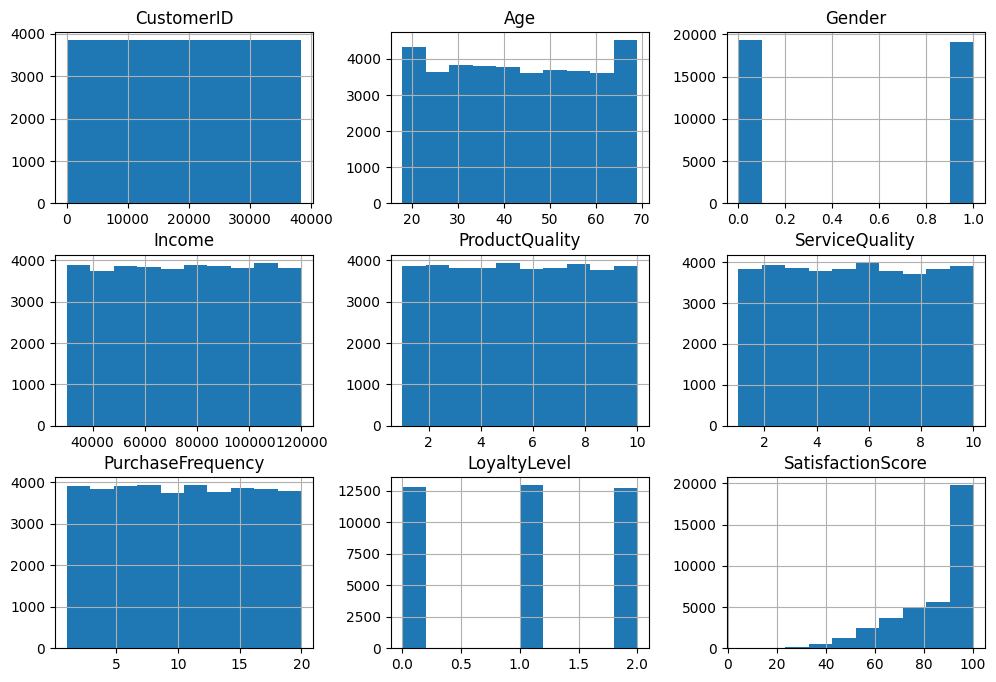

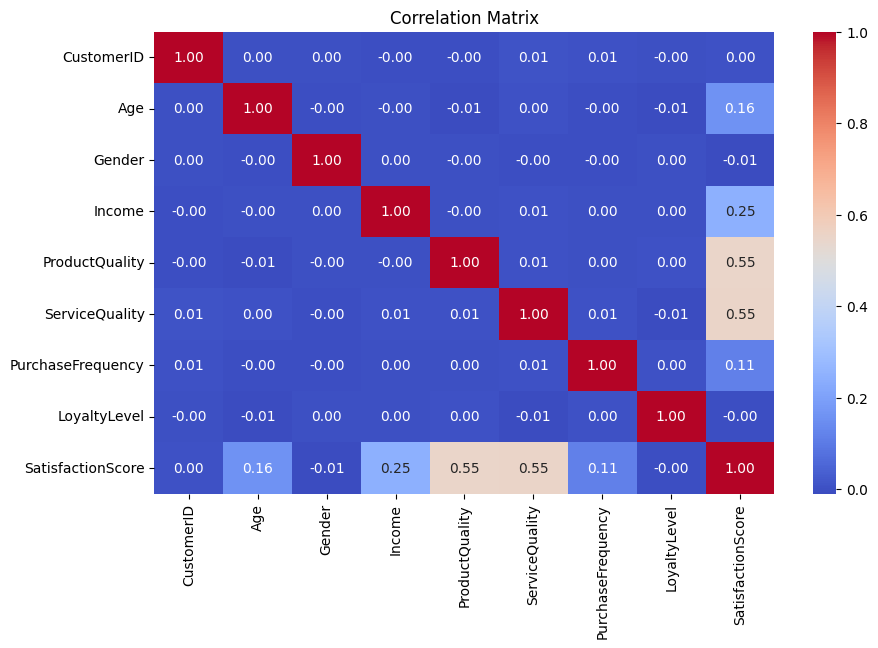

C:\Users\Sadneya\AppData\Local\Temp\ipykernel_24404\2239646546.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['SatisfactionScore'], y=data['FeedbackScore'], palette="Set2")


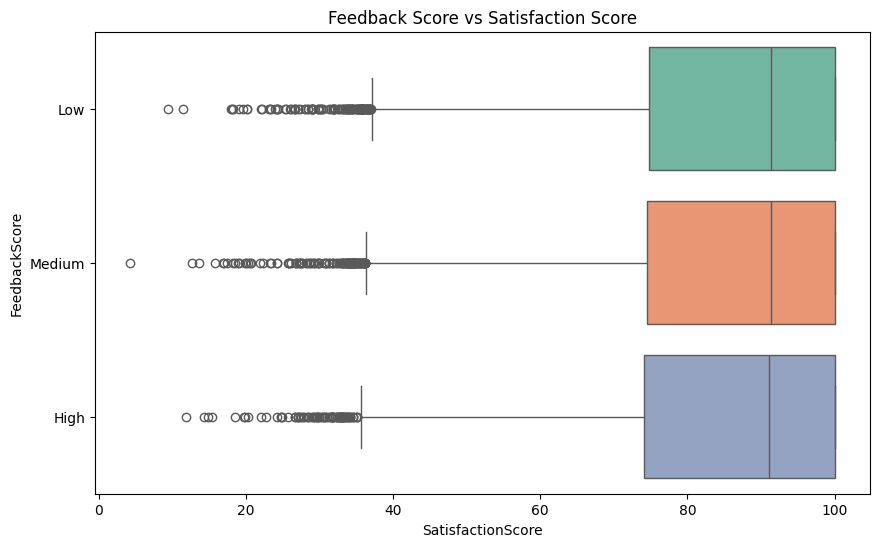

In [7]:
# Histograms of numerical features
data.hist(bins=10, figsize=(12, 8))
plt.show()

# Correlation matrix (only numerical columns)
numeric_data = data.select_dtypes(include=[np.number])
correlation = numeric_data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Boxplot for feedback score and satisfaction score
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['SatisfactionScore'], y=data['FeedbackScore'], palette="Set2")
plt.title('Feedback Score vs Satisfaction Score')
plt.show()


**6. Feature Selection and Splitting Data**

Mean Absolute Error: 5.6981972037976325


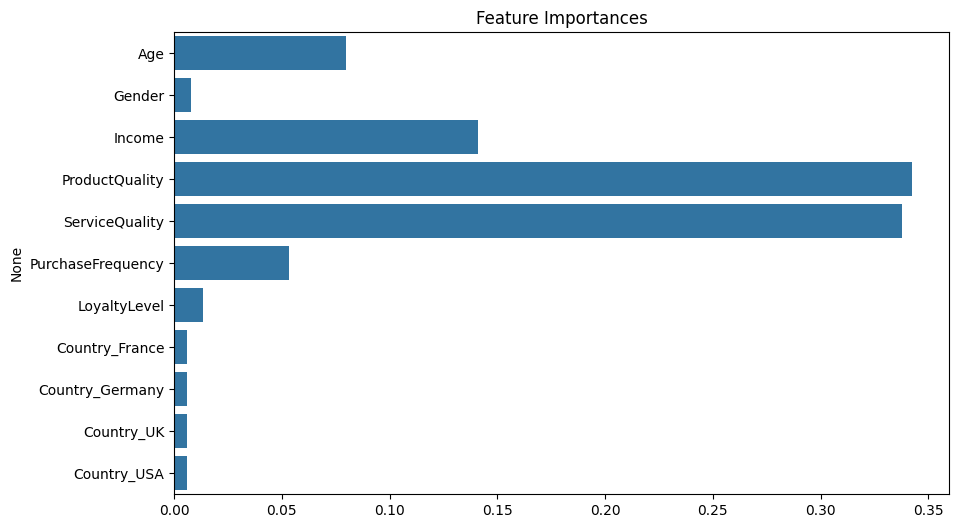

In [8]:
# Let's assume we want to predict the SatisfactionScore
X = data.drop(columns=['SatisfactionScore', 'CustomerID', 'FeedbackScore'])
y = data['SatisfactionScore']  # Target variable for prediction

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model: Random Forest Regressor (since we are predicting a continuous value)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Feature Importances from Random Forest Model
feature_importances = rf_model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importances')
plt.show()

In [9]:
# Show sample processed data
print(data.head())

   CustomerID  Age  Gender  Income  ProductQuality  ServiceQuality  \
0           1   56       1   83094               5               8   
1           2   69       1   86860              10               2   
2           3   46       0   60173               8              10   
3           4   32       0   73884               7              10   
4           5   60       1   97546               6               4   

   PurchaseFrequency FeedbackScore  LoyaltyLevel  SatisfactionScore  \
0                  5           Low             0              100.0   
1                  8        Medium             1              100.0   
2                 18        Medium             2              100.0   
3                 16           Low             1              100.0   
4                 13           Low             0               82.0   

   Country_France  Country_Germany  Country_UK  Country_USA  
0           False            False        True        False  
1           False           

**Example**

In [10]:
# Example new customer data
new_data = {
    'Age': [45],  # Age: 45
    'Gender': ['Female'],  # Gender: Female
    'Income': [75000],  # Income: 75000
    'ProductQuality': [7],  # ProductQuality: 7
    'ServiceQuality': [6],  # ServiceQuality: 6
    'PurchaseFrequency': [10],  # PurchaseFrequency: 10
    'FeedbackScore': ['Medium'],  # FeedbackScore: Medium
    'LoyaltyLevel': ['Silver'],  # LoyaltyLevel: Silver
    'Country_France': [0],  # Assuming customer is not from France
    'Country_Germany': [0],  # Assuming customer is not from Germany
    'Country_UK': [0],  # Assuming customer is not from the UK
    'Country_USA': [1]  # Customer is from the USA
}

new_data_2 = {
    'Age': [30],  # Age: 30
    'Gender': ['Male'],  # Gender: Male
    'Income': [50000],  # Income: 50000
    'ProductQuality': [8],  # ProductQuality: 8
    'ServiceQuality': [7],  # ServiceQuality: 7
    'PurchaseFrequency': [5],  # PurchaseFrequency: 5
    'FeedbackScore': ['High'],  # FeedbackScore: High
    'LoyaltyLevel': ['Gold'],  # LoyaltyLevel: Gold
    'Country_France': [0],  # Customer is not from France
    'Country_Germany': [0],  # Customer is not from Germany
    'Country_UK': [1],  # Customer is from the UK
    'Country_USA': [0]  # Customer is not from the USA
}

new_data_3 = {
    'Age': [50],  # Age: 50
    'Gender': ['Female'],  # Gender: Female
    'Income': [90000],  # Income: 90000
    'ProductQuality': [9],  # ProductQuality: 9
    'ServiceQuality': [9],  # ServiceQuality: 9
    'PurchaseFrequency': [20],  # PurchaseFrequency: 20
    'FeedbackScore': ['High'],  # FeedbackScore: High
    'LoyaltyLevel': ['Platinum'],  # LoyaltyLevel: Platinum
    'Country_France': [0],  # Customer is not from France
    'Country_Germany': [1],  # Customer is from Germany
    'Country_UK': [0],  # Customer is not from the UK
    'Country_USA': [0]  # Customer is not from the USA
}

# Convert new data to DataFrame
new_data_df = pd.DataFrame(new_data)
new_data_df_2 = pd.DataFrame(new_data_2)
new_data_df_3 = pd.DataFrame(new_data_3)

# Map Gender and other categories based on trained encodings
new_data_df['Gender'] = [1]  # Gender: Female
new_data_df['FeedbackScore'] = [1]  # Assuming 'Medium' was mapped to 1
new_data_df['LoyaltyLevel'] = [2]  # Assuming 'Silver' was mapped to 2

new_data_df_2['Gender'] = [0]  # Gender: Male
new_data_df_2['FeedbackScore'] = [2]  # Assuming 'High' is mapped to 2
new_data_df_2['LoyaltyLevel'] = [3]  # Assuming 'Gold' is mapped to 3

new_data_df_3['Gender'] = [1]  # Gender: Female
new_data_df_3['FeedbackScore'] = [2]  # Assuming 'High' is mapped to 2
new_data_df_3['LoyaltyLevel'] = [4]  # Assuming 'Platinum' is mapped to 4


# Ensure the new data matches the feature columns of the trained model
for col in X.columns:
    if col not in new_data_df:
        new_data_df[col] = 0  # Add missing columns with default value 0
    if col not in new_data_df_2:
        new_data_df_2[col] = 0  # Add missing columns with default value 0
    if col not in new_data_df_3:
        new_data_df_3[col] = 0  # Add missing columns with default value 0


# Align columns (if order differs)
new_data_df = new_data_df[X.columns]
new_data_df_2 = new_data_df_2[X.columns]
new_data_df_3 = new_data_df_3[X.columns]

# Make a prediction
new_pred = rf_model.predict(new_data_df)
new_pred_2 = rf_model.predict(new_data_df_2)
new_pred_3 = rf_model.predict(new_data_df_3)


# Display the predicted SatisfactionScore
print(f"Predicted Satisfaction Score for Customer 1: {new_pred[0]}")
print(f"Predicted Satisfaction Score for Customer 2: {new_pred_2[0]}")
print(f"Predicted Satisfaction Score for Customer 3: {new_pred_3[0]}")


Predicted Satisfaction Score for Customer 1: 96.42720000000008
Predicted Satisfaction Score for Customer 2: 92.73589999999996
Predicted Satisfaction Score for Customer 3: 100.0
